### CDF of EADAM vs MM

This graph compares the CDFs of EADAM and MM cycle-lengths.

In [85]:
import pandas as pd
import numpy as np
import os
os.chdir('C:/Users/v-kirdwivedi/Documents/GitHub/MatchingAlgorithm/')
from multi_funcs import *
from funcs import *

import matplotlib.pyplot as plt
import seaborn as sns
os.chdir(r'C:\Users\v-kirdwivedi\Documents\GitHub\MatchingAlgorithm')

In [89]:
from scipy import stats

In [90]:
def prep(k, n):
    df = pd.read_csv(f'data/simulations/max_length_matches_w_eadam/n_{n}_k_{k}_max_length_diff_eadam.csv')
    df = df.sort_values(by=['cycle_lengths_eadam']).reset_index(drop=True)
    df = df.iloc[:-10, :]
    nbins = 5*k
    if k == 3:
        nbins = 8
    df['binned'] = pd.cut(df['cycle_lengths_eadam'], bins = nbins, include_lowest=True)
    df['binned'] = df["binned"].apply(lambda x: x.left)
    grouped = df.groupby('binned').size()/len(df)
    x = pd.DataFrame(grouped).reset_index(drop=False)
    x['1-CDF'] = 1 - x[0].cumsum()
    x['log'] = np.log(x['1-CDF'])
    return x.iloc[:-1,:]

In [91]:
def prep2(k, n):
    df = pd.read_csv(f'data/simulations/max_length_matches_w_eadam/n_{n}_k_{k}_max_length_diff.csv')
    df = df.sort_values(by=['cycle_lengths']).reset_index(drop=True)
    df = df.iloc[:-10, :]
    nbins = 5*k
    if k == 3:
        nbins = 8
    df['binned'] = pd.cut(df['cycle_lengths'], bins = nbins, include_lowest=True)
    df['binned'] = df["binned"].apply(lambda x: x.left)
    grouped = df.groupby('binned').size()/len(df)
    x = pd.DataFrame(grouped).reset_index(drop=False)
    x['1-CDF'] = 1 - x[0].cumsum()
    x['log'] = np.log(x['1-CDF'])
    return x.iloc[:-1,:]

c:\ProgramData\anaconda3\envs\CatchALL_20231003\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\ProgramData\anaconda3\envs\CatchALL_20231003\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\ProgramData\anaconda3\envs\CatchALL_20231003\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\ProgramData\anaconda3\envs\CatchALL_20231003\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\ProgramData\anaconda3\envs\CatchALL_20231003\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


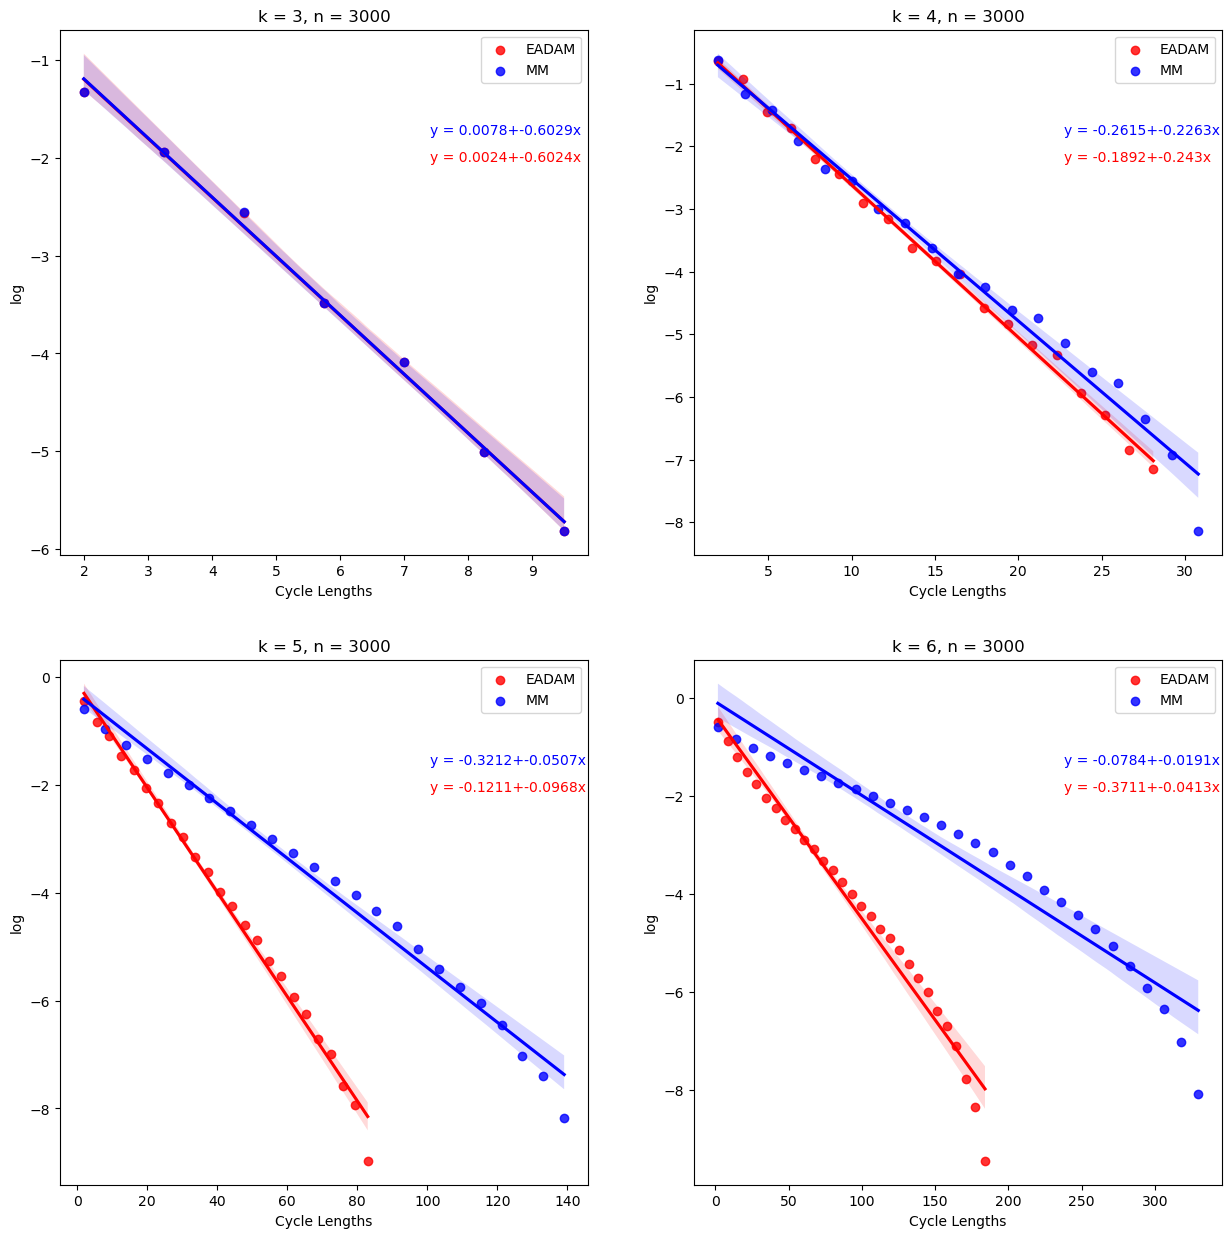

In [93]:
n = 3000
fig, ax = plt.subplots(2, 2, figsize=(15, 15))

df = prep(3, n)
sns.regplot(x='binned', y='log', data=df, ax=ax[0, 0], color='red', label='EADAM')
res1 = stats.linregress(x=df['binned'], y=df['log'])
ax[0, 0].text(0.7, 0.75, 'y = ' + str(round(res1.intercept, 4))+'+'+str(round(res1.slope,4))+'x', transform=ax[0,0].transAxes, color = 'red')

df2 = prep2(3, n)
sns.regplot(x='binned', y='log', data=df2, ax=ax[0, 0], color='blue', label='MM')
res2 = stats.linregress(x=df2['binned'], y=df2['log'])
ax[0, 0].text(0.7, 0.8, 'y = ' + str(round(res2.intercept, 4))+'+'+str(round(res2.slope,4))+'x', transform=ax[0,0].transAxes, color='blue')

ax[0,0].set_title(f'k = 3, n = {n}')
ax[0,0].set_xlabel('Cycle Lengths')
ax[0,0].legend()



df = prep(4, n)
sns.regplot(x='binned', y='log', data=df, ax=ax[0, 1], color = 'red', label = 'EADAM')
res2 = stats.linregress(x=df['binned'], y=df['log'])
ax[0, 1].text(0.7, 0.75, 'y = ' + str(round(res2.intercept, 4))+'+'+str(round(res2.slope,4))+'x', transform=ax[0,1].transAxes, color = 'red')

df2 = prep2(4, n)
sns.regplot(x='binned', y='log', data=df2, ax=ax[0, 1], color = 'blue', label='MM')
res2 = stats.linregress(x=df2['binned'], y=df2['log'])
ax[0, 1].text(0.7, 0.8, 'y = ' + str(round(res2.intercept, 4))+'+'+str(round(res2.slope,4))+'x', transform=ax[0,1].transAxes, color='blue')
ax[0,1].set_title(f'k = 4, n = {n}')
ax[0,1].set_xlabel('Cycle Lengths')
ax[0,1].legend()


df = prep(5, n)
sns.regplot(x='binned', y='log', data=df, ax=ax[1, 0], color='red', label='EADAM')
res1 = stats.linregress(x=df['binned'], y=df['log'])
ax[1, 0].text(0.7, 0.75, 'y = ' + str(round(res1.intercept, 4))+'+'+str(round(res1.slope,4))+'x', transform=ax[1,0].transAxes, color = 'red')

df2 = prep2(5, n)
sns.regplot(x='binned', y='log', data=df2, ax=ax[1, 0], color='blue', label='MM')
res2 = stats.linregress(x=df2['binned'], y=df2['log'])
ax[1, 0].text(0.7, 0.8, 'y = ' + str(round(res2.intercept, 4))+'+'+str(round(res2.slope,4))+'x', transform=ax[1,0].transAxes, color='blue')


ax[1,0].set_title(f'k = 5, n = {n}')
ax[1,0].set_xlabel('Cycle Lengths')
ax[1,0].legend()


df = prep(6, n)
sns.regplot(x='binned', y='log', data=df, ax=ax[1, 1], color = 'red', label='EADAM')
res2 = stats.linregress(x=df['binned'], y=df['log'])
ax[1, 1].text(0.7, 0.75, 'y = ' + str(round(res2.intercept, 4))+'+'+str(round(res2.slope,4))+'x', transform=ax[1,1].transAxes, color = 'red')

df2 = prep2(6, n)
sns.regplot(x='binned', y='log', data=df2, ax=ax[1, 1], color = 'blue', label='MM')
res2 = stats.linregress(x=df2['binned'], y=df2['log'])
ax[1, 1].text(0.7, 0.8, 'y = ' + str(round(res2.intercept, 4))+'+'+str(round(res2.slope,4))+'x', transform=ax[1,1].transAxes, color='blue')

ax[1,1].set_title(f'k = 6, n = {n}')
ax[1,1].set_xlabel('Cycle Lengths')
ax[1,1].legend()


Text(0, 0.5, 'Log(1-CDF)')

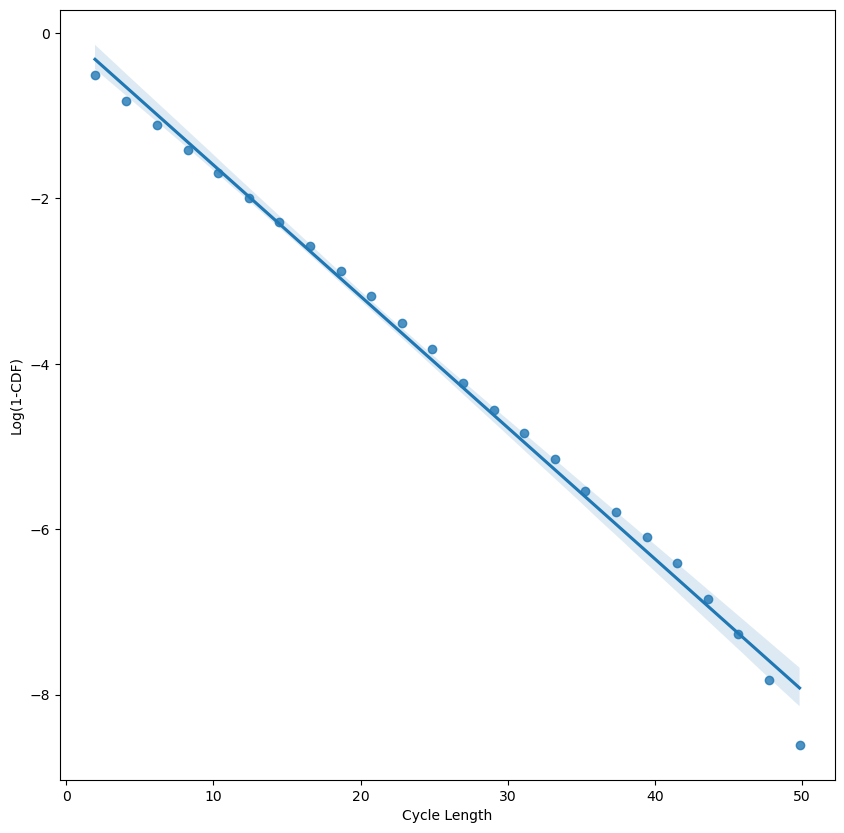

In [84]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.regplot(x='binned', y='log', data=prep(5, 1000).iloc[:-1,:], label='k=5, n=1000', ax=ax)
ax.set_xlabel('Cycle Length')
ax.set_ylabel('Log(1-CDF)')

Table of Regression Results

In [94]:
def regress(n,k):
    df2 = prep2(k, n)
    res2 = stats.linregress(x=df2['binned'], y=df2['log'])
    return res2

In [104]:
def regress2(n,k):
    df2 = prep(k, n)
    res2 = stats.linregress(x=df2['binned'], y=df2['log'])
    return res2

In [95]:
import itertools

In [102]:
df = pd.DataFrame(list(itertools.product([1000, 2000, 3000, 4000], [3, 4, 5, 6], ['eadam', 'MM'])))

In [105]:
df['intercept'] = df.apply(lambda x: regress(x[0], x[1]).intercept if x[2] == 'MM' else regress2(x[0], x[1]).intercept, axis=1)

c:\ProgramData\anaconda3\envs\CatchALL_20231003\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\ProgramData\anaconda3\envs\CatchALL_20231003\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\ProgramData\anaconda3\envs\CatchALL_20231003\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\ProgramData\anaconda3\envs\CatchALL_20231003\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\ProgramData\anaconda3\envs\CatchALL_20231003\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Pro

In [107]:
df['beta_1'] = df.apply(lambda x: regress(x[0], x[1]).slope if x[2] == 'MM' else regress2(x[0], x[1]).slope, axis=1)

c:\ProgramData\anaconda3\envs\CatchALL_20231003\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\ProgramData\anaconda3\envs\CatchALL_20231003\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\ProgramData\anaconda3\envs\CatchALL_20231003\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\ProgramData\anaconda3\envs\CatchALL_20231003\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\ProgramData\anaconda3\envs\CatchALL_20231003\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Pro

In [110]:
df.columns = ['n', 'k', 'method', 'intercept', 'beta_1']

In [112]:
pivoted = df.pivot_table(index=['n', 'k'], columns='method', values=['intercept', 'beta_1'])

In [117]:
pivoted.to_excel('regression_results.xlsx')

In [118]:
pivoted

beta_1           intercept          
method        MM     eadam        MM     eadam
n    k                                        
1000 3 -0.826427 -0.828183  0.546623  0.542983
     4 -0.289838 -0.325774  0.066595  0.186779
     5 -0.101143 -0.158737 -0.146624 -0.008062
     6 -0.049372 -0.092660  0.043780 -0.061846
2000 3 -0.760075 -0.805801  0.252425  0.398023
     4 -0.237715 -0.292103 -0.154671  0.202025
     5 -0.065485 -0.118705 -0.320533 -0.045090
     6 -0.029527 -0.053925  0.096573 -0.381832
3000 3 -0.602926 -0.602355  0.007802  0.002395
     4 -0.226285 -0.243048 -0.261509 -0.189243
     5 -0.050685 -0.096759 -0.321196 -0.121146
     6 -0.019106 -0.041332 -0.078415 -0.371114
4000 3 -0.806296 -0.806403  0.934371  0.931184
     4 -0.217759 -0.234946 -0.289147 -0.176718
     5 -0.042739 -0.088116 -0.332450 -0.041976
     6 -0.015926 -0.030974  0.051626 -0.557490

In [ ]:
def find_mean_std(n,k):
    df = pd.read_csv(f'data/simulations/max_length_matches_w_eadam/n_{n}_k_{k}_max_length_diff_eadam.csv')
    

In [119]:
df = pd.read_csv(f'data/simulations/max_length_matches_w_eadam/n_{n}_k_{k}_max_length_diff_eadam.csv')


In [122]:
df['n_matches'] = df['cycle_lengths_eadam']/df['as_percent_of_matches_eadam']

In [123]:
df

,Unnamed: 0,n,k,cycle_lengths_eadam,as_percent_of_matches_eadam,n_matches
0,0,3000,5,4,0.001481,2701.0
1,1,3000,5,6,0.002221,2701.0
2,2,3000,5,11,0.004073,2701.0
3,3,3000,5,11,0.004034,2727.0
4,4,3000,5,50,0.018335,2727.0
...,...,...,...,...,...,...
39345,39345,3000,5,11,0.004037,2725.0
39346,39346,3000,5,4,0.001468,2725.0
39347,39347,3000,5,9,0.003303,2725.0
39348,39348,3000,5,3,0.001095,2740.0


In [132]:
df['to_bin_by'] = df['n_matches'] + df['Unnamed: 0']/100000

In [182]:
df['binned'] = pd.cut(df['to_bin_by'], bins = 275715)

In [183]:
df

,Unnamed: 0,n,k,cycle_lengths_eadam,as_percent_of_matches_eadam,n_matches,binned,to_bin_by
0,0,3000,5,4,0.001481,2701.0,"(2700.9999, 2701.0002]",2701.00000
1,1,3000,5,6,0.002221,2701.0,"(2700.9999, 2701.0002]",2701.00001
2,2,3000,5,11,0.004073,2701.0,"(2700.9999, 2701.0002]",2701.00002
3,3,3000,5,11,0.004034,2727.0,"(2726.9999, 2727.0001]",2727.00003
4,4,3000,5,50,0.018335,2727.0,"(2726.9999, 2727.0001]",2727.00004
...,...,...,...,...,...,...,...,...
39345,39345,3000,5,11,0.004037,2725.0,"(2725.3933, 2725.3936]",2725.39345
39346,39346,3000,5,4,0.001468,2725.0,"(2725.3933, 2725.3936]",2725.39346
39347,39347,3000,5,9,0.003303,2725.0,"(2725.3933, 2725.3936]",2725.39347
39348,39348,3000,5,3,0.001095,2740.0,"(2740.3933, 2740.3936]",2740.39348


In [184]:
df['binned'].unique()

[(2700.9999, 2701.0002], (2726.9999, 2727.0001], (2727.0001, 2727.0004], (2726.0001, 2726.0004], (2714.0002, 2714.0004], ..., (2735.3932, 2735.3935], (2727.3934, 2727.3936], (2720.3932, 2720.3935], (2725.3933, 2725.3936], (2740.3933, 2740.3936]]
Length: 10085
Categories (275715, interval[float64, right]): [(2689.9794, 2690.0537] < (2690.0537, 2690.0539] < (2690.0539, 2690.0542] < (2690.0542, 2690.0545] ... (2764.0115, 2764.0118] < (2764.0118, 2764.012] < (2764.012, 2764.0123] < (2764.0123, 2764.0126]]

In [194]:
length = 10
while length != 10000:
    df['binned'] = pd.cut(df['to_bin_by'], bins = x)
    if len(df['binned'].unique()) < 10000:
        x = x+1
    else:
        x = x-1
    length - len(df['binned'].unique())

KeyboardInterrupt: 

In [201]:
df['binned'] = pd.cut(df['to_bin_by'], bins = 275700)

In [202]:
len(df['binned'].unique())

9996

In [203]:
x

275710

In [205]:
df.groupby('binned').size()

binned
(2689.9794, 2690.0537]    5
(2690.0537, 2690.0539]    0
(2690.0539, 2690.0542]    0
(2690.0542, 2690.0545]    0
(2690.0545, 2690.0547]    0
                         ..
(2764.0112, 2764.0115]    0
(2764.0115, 2764.0118]    0
(2764.0118, 2764.012]     0
(2764.012, 2764.0123]     0
(2764.0123, 2764.0126]    2
Length: 275700, dtype: int64

In [207]:
df['cycle_lengths_eadam'].sum()/(10000*1000)

0.046024